# Neural Networks For Market Trading

In [ ]:
import pandas as pd
df = pd.read_csv("RELIANCE.NS.csv")

#Check if NA values are in data
df=df[df['Volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6825,2023-07-28,2512.050049,2542.850098,2500.550049,2527.850098,2527.850098,10413926.0
6826,2023-07-31,2527.850098,2553.899902,2517.949951,2549.250000,2549.250000,4275587.0
6827,2023-08-01,2555.000000,2559.000000,2505.300049,2513.199951,2513.199951,4768316.0
6828,2023-08-02,2509.199951,2512.000000,2463.600098,2486.350098,2486.350098,6374107.0
6829,2023-08-03,2475.300049,2500.899902,2458.050049,2475.899902,2475.899902,5084175.0


In [ ]:
df.set_axis(['Date', 'open', 'high','low','close','adj close','volume'], axis='columns', inplace=True)
df.tail()

<ipython-input-80-28518054099b>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['Date', 'open', 'high','low','close','adj close','volume'], axis='columns', inplace=True)


,Date,open,high,low,close,adj close,volume
6825,2023-07-28,2512.050049,2542.850098,2500.550049,2527.850098,2527.850098,10413926.0
6826,2023-07-31,2527.850098,2553.899902,2517.949951,2549.250000,2549.250000,4275587.0
6827,2023-08-01,2555.000000,2559.000000,2505.300049,2513.199951,2513.199951,4768316.0
6828,2023-08-02,2509.199951,2512.000000,2463.600098,2486.350098,2486.350098,6374107.0
6829,2023-08-03,2475.300049,2500.899902,2458.050049,2475.899902,2475.899902,5084175.0


In [ ]:
df.interpolate()

,Date,open,high,low,close,adj close,volume
0,1996-01-01,15.859429,15.944529,15.754989,15.917452,10.477990,48051995.0
1,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396508,77875009.0
2,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475445,96602936.0
3,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378684,100099436.0
4,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307390,76935930.0
...,...,...,...,...,...,...,...
6825,2023-07-28,2512.050049,2542.850098,2500.550049,2527.850098,2527.850098,10413926.0
6826,2023-07-31,2527.850098,2553.899902,2517.949951,2549.250000,2549.250000,4275587.0
6827,2023-08-01,2555.000000,2559.000000,2505.300049,2513.199951,2513.199951,4768316.0
6828,2023-08-02,2509.199951,2512.000000,2463.600098,2486.350098,2486.350098,6374107.0


# Support and Resistance FUNCTIONS

In [ ]:
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.low[i]>df1.low[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.low[i]<df1.low[i-1]):
            return 0
    return 1

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.high[i]<df1.high[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.high[i]>df1.high[i-1]):
            return 0
    return 1

In [ ]:
length = len(df)
high = list(df['high'])
low = list(df['low'])
close = list(df['close'])
open = list(df['open'])
bodydiff = [0] * length

highdiff = [0] * length
lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length

def isEngulfing(l):
    row=l
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001

    bodydiffmin = 0.002
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]<close[row-1] and
        open[row]>close[row] and
        (open[row]-close[row-1])>=-0e-5 and close[row]<open[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]>close[row-1] and
        open[row]<close[row] and
        (open[row]-close[row-1])<=+0e-5 and close[row]>open[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0

def isStar(l):
    bodydiffmin = 0.0020
    row=l
    highdiff[row] = high[row]-max(open[row],close[row])
    lowdiff[row] = min(open[row],close[row])-low[row]
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001
    ratio1[row] = highdiff[row]/bodydiff[row]
    ratio2[row] = lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and lowdiff[row]<0.2*highdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]>close[row]):
        return 1
    elif (ratio2[row]>1 and highdiff[row]<0.2*lowdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]<close[row]):
        return 2
    else:
        return 0

def closeResistance(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.high[l]-min(levels, key=lambda x:abs(x-df.high[l])))<=lim
    c2 = abs(max(df.open[l],df.close[l])-min(levels, key=lambda x:abs(x-df.high[l])))<=lim
    c3 = min(df.open[l],df.close[l])<min(levels, key=lambda x:abs(x-df.high[l]))
    c4 = df.low[l]<min(levels, key=lambda x:abs(x-df.high[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0

def closeSupport(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.low[l]-min(levels, key=lambda x:abs(x-df.low[l])))<=lim
    c2 = abs(min(df.open[l],df.close[l])-min(levels, key=lambda x:abs(x-df.low[l])))<=lim
    c3 = max(df.open[l],df.close[l])>min(levels, key=lambda x:abs(x-df.low[l]))
    c4 = df.high[l]>min(levels, key=lambda x:abs(x-df.low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0

In [ ]:
n1=2
n2=2
backCandles=30
signal = [0] * length

for row in range(backCandles, len(df)-n2):
    ss = []
    rr = []
    for subrow in range(row-backCandles+n1, row+1):
        if support(df, subrow, n1, n2):
            ss.append(df.low[subrow])
        if resistance(df, subrow, n1, n2):
            rr.append(df.high[subrow])
    #!!!! parameters
    if ((isEngulfing(row)==1 or isStar(row)==1) and closeResistance(row, rr, 150e-5) ):#and df.RSI[row]<30
        signal[row] = 1
    elif((isEngulfing(row)==2 or isStar(row)==2) and closeSupport(row, ss, 150e-5)):#and df.RSI[row]>70
        signal[row] = 2
    else:
        signal[row] = 0



In [ ]:
df['signal']=signal

In [ ]:
df[df['signal']==1].count()

Date         78
open         78
high         78
low          78
close        78
adj close    78
volume       78
signal       78
dtype: int64

In [ ]:
df.head()

,Date,open,high,low,close,adj close,volume,signal
0,1996-01-01,15.859429,15.944529,15.754989,15.917452,10.477990,48051995.0,0
1,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396508,77875009.0,0
2,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475445,96602936.0,0
3,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378684,100099436.0,0
4,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307390,76935930.0,0


In [ ]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close','Adj close', 'Volume', 'signal']
#df=df.iloc[100:200]
df

,Date,Open,High,Low,Close,Adj close,Volume,signal
0,1996-01-01,15.859429,15.944529,15.754989,15.917452,10.477990,48051995.0,0
1,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396508,77875009.0,0
2,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475445,96602936.0,0
3,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378684,100099436.0,0
4,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307390,76935930.0,0
...,...,...,...,...,...,...,...,...
6825,2023-07-28,2512.050049,2542.850098,2500.550049,2527.850098,2527.850098,10413926.0,0
6826,2023-07-31,2527.850098,2553.899902,2517.949951,2549.250000,2549.250000,4275587.0,0
6827,2023-08-01,2555.000000,2559.000000,2505.300049,2513.199951,2513.199951,4768316.0,1
6828,2023-08-02,2509.199951,2512.000000,2463.600098,2486.350098,2486.350098,6374107.0,0


In [ ]:
def SIGNAL():
    return df.signal

In [ ]:
#A new strategy needs to extend Strategy class and override its two abstract methods: init() and next().
#Method init() is invoked before the strategy is run. Within it, one ideally precomputes in efficient,
#vectorized manner whatever indicators and signals the strategy depends on.
#Method next() is then iteratively called by the Backtest instance, once for each data point (data frame row),
#simulating the incremental availability of each new full candlestick bar.

#Note, backtesting.py cannot make decisions / trades within candlesticks — any new orders are executed on the
#next candle's open (or the current candle's close if trade_on_close=True).
#If you find yourself wishing to trade within candlesticks (e.g. daytrading), you instead need to begin
#with more fine-grained (e.g. hourly) data.

In [ ]:
!pip install backtesting

In [ ]:
from backtesting import Strategy

class MyCandlesStrat(Strategy):
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        if self.signal1==2:
            sl1 = self.data.Close[-1] - 600e-4
            tp1 = self.data.Close[-1] + 450e-4
            self.buy(sl=sl1, tp=tp1)
        elif self.signal1==1:
            sl1 = self.data.Close[-1] + 600e-4
            tp1 = self.data.Close[-1] - 450e-4
            self.sell(sl=sl1, tp=tp1)

In [ ]:
df[df.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj close,Volume,signal
1806,2003-04-14,NaN,NaN,NaN,NaN,NaN,NaN,0
2065,2004-04-26,NaN,NaN,NaN,NaN,NaN,NaN,0
2187,2004-10-13,NaN,NaN,NaN,NaN,NaN,NaN,0
3495,2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN,0
3973,2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN,0
4012,2012-03-03,NaN,NaN,NaN,NaN,NaN,NaN,0
4142,2012-09-08,NaN,NaN,NaN,NaN,NaN,NaN,0
4184,2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN,0
4521,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN,0
4748,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df = df.dropna(axis = 0, how ='any')

In [ ]:
df[df.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj close,Volume,signal


In [ ]:
from backtesting import Backtest

bt = Backtest(df, MyCandlesStrat, cash=10_000, commission=.00)
stat = bt.run()
stat



<ipython-input-96-caac61bd14fb>:3: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(df, MyCandlesStrat, cash=10_000, commission=.00)


Start                                     0.0
End                                    6829.0
Duration                               6829.0
Exposure Time [%]                     2.28739
Equity Final [$]                  7444.279234
Equity Peak [$]                       10000.0
Return [%]                         -25.557208
Buy & Hold Return [%]            15454.624584
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -25.557208
Avg. Drawdown [%]                  -25.557208
Max. Drawdown Duration                 6751.0
Avg. Drawdown Duration                 6751.0
# Trades                                156.0
Win Rate [%]                         0.641026
Best Trade [%]                       0.022822
Worst Trade [%]                     -5.170471
Avg. Trade [%]                    

In [ ]:
bt.plot()

GridPlot(id='p1307', ...)

In [ ]:
#Target flexible way
pipdiff = 250*1e-4 #for TP
SLTPRatio = 1 #pipdiff/Ratio gives SL
def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trendcat = [None] * length
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)
        #if ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 2 # bth limits exceeded
        #elif ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 3 #-1 downtrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
        #    trendcat[line] = 1 # uptrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 0 # no trend
        #elif ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 5 # light trend down
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 4 # light trend up
            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend

    return trendcat

<ipython-input-99-2e02cd96138b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = mytarget(30, df)


<Axes: >

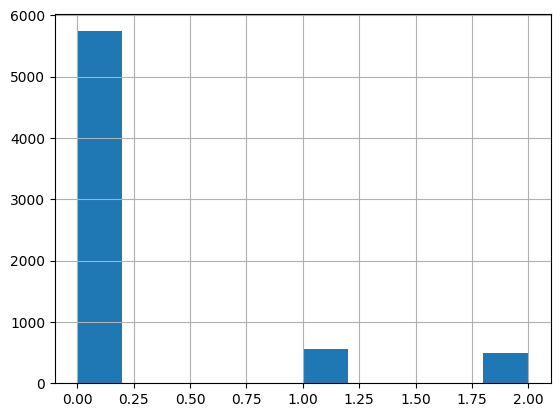

In [ ]:
#!!! pitfall one category high frequency
df['Target'] = mytarget(30, df)
#df.tail(20)
#df['Target'] = df['Target'].astype(int)
df['Target'].hist()

In [ ]:
!pip install pandas_ta

In [ ]:
import pandas_ta as pa
df["RSI"] = pa.rsi(df.Close, length=16)
df.tail(20)

<ipython-input-102-2fb16f870a96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RSI"] = pa.rsi(df.Close, length=16)


,Date,Open,High,Low,Close,Adj close,Volume,signal,Target,RSI
6810,2023-07-07,2635.000000,2664.949951,2628.000000,2633.600098,2633.600098,6172684.0,0,NaN,65.798177
6811,2023-07-10,2688.899902,2756.000000,2675.000000,2735.050049,2735.050049,15340262.0,0,NaN,73.923743
6812,2023-07-11,2752.899902,2770.000000,2737.600098,2764.699951,2764.699951,9262001.0,0,NaN,75.721868
6813,2023-07-12,2766.300049,2802.000000,2761.649902,2767.750000,2767.750000,8645662.0,1,NaN,75.904186
6814,2023-07-13,2783.899902,2799.000000,2737.250000,2743.000000,2743.000000,6776172.0,0,NaN,71.271566
6815,2023-07-14,2750.000000,2760.899902,2725.100098,2740.699951,2740.699951,6979790.0,0,NaN,70.842970
6816,2023-07-17,2747.000000,2815.050049,2728.000000,2796.699951,2796.699951,10254545.0,0,NaN,74.781474
6817,2023-07-18,2817.000000,2837.449951,2793.000000,2820.449951,2820.449951,11937761.0,0,NaN,76.233762
6818,2023-07-19,2830.000000,2856.000000,2797.000000,2841.850098,2841.850098,18054869.0,0,NaN,77.480224
6819,2023-07-20,2580.000000,2630.949951,2580.000000,2619.850098,2619.850098,19358812.0,0,NaN,49.027525


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.describe())

              Open         High          Low        Close    Adj close  \
count  6772.000000  6772.000000  6772.000000  6772.000000  6772.000000   
mean    584.328337   591.285701   576.796046   583.759064   564.035740   
std     702.215509   709.485305   694.314581   701.595969   703.228027   
min      11.836550    12.439982    11.763055    11.890704     7.827301   
25%      53.380520    54.275997    52.452164    53.223858    42.049291   
50%     417.566879   423.238129   412.663361   417.083954   386.580078   
75%     596.904419   612.125793   582.057694   596.223388   536.946335   
max    2856.149902  2856.149902  2786.100098  2819.850098  2811.385742   

             Volume       signal       Target          RSI  
count  6.772000e+03  6772.000000  6772.000000  6772.000000  
mean   2.897450e+07     0.034259     0.226373    52.689467  
std    4.826256e+07     0.236916     0.565065    11.329170  
min    2.132820e+05     0.000000     0.000000    12.801960  
25%    6.818636e+06     0.00

<ipython-input-103-2e211ea30e26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
attributes = ['RSI', 'signal', 'Target']
df_model= df[attributes].copy()

df_model['signal'] = pd.Categorical(df_model['signal'])
dfDummies = pd.get_dummies(df_model['signal'], prefix = 'signalcategory')
df_model= df_model.drop(['signal'], axis=1)
df_model = pd.concat([df_model, dfDummies], axis=1)
df_model

,RSI,Target,signalcategory_0,signalcategory_1,signalcategory_2
0,17.082547,0.0,1,0,0
1,14.883987,0.0,1,0,0
2,12.802644,0.0,1,0,0
3,31.198914,0.0,1,0,0
4,46.127626,0.0,1,0,0
...,...,...,...,...,...
6767,56.275289,0.0,1,0,0
6768,62.386522,0.0,1,0,0
6769,66.593368,0.0,1,0,0
6770,66.683113,2.0,1,0,0


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

attributes = ['RSI', 'signalcategory_0', 'signalcategory_1', 'signalcategory_2']
X = df_model[attributes]
y = df_model['Target']

train_pct_index = int(0.7 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 83.5021%
****Test Results****
Accuracy: 88.4350%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix_train = confusion_matrix(y_train, pred_train)
matrix_test = confusion_matrix(y_test, pred_test)

print(matrix_train)
print(matrix_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print(report_train)
print(report_test)
#choices = [2, 0, -1, +1]
##choices = [2, 0, 3, +1]
print(model.get_booster().feature_names)

[[3909    2    1]
 [ 392   28    0]
 [ 386    1   21]]
[[1796   11    8]
 [ 134    1    2]
 [  78    2    0]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      3912
         1.0       0.90      0.07      0.12       420
         2.0       0.95      0.05      0.10       408

    accuracy                           0.84      4740
   macro avg       0.90      0.37      0.38      4740
weighted avg       0.85      0.84      0.77      4740

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      1815
         1.0       0.07      0.01      0.01       137
         2.0       0.00      0.00      0.00        80

    accuracy                           0.88      2032
   macro avg       0.32      0.33      0.32      2032
weighted avg       0.80      0.88      0.84      2032

['RSI', 'signalcategory_0', 'signalcategory_1', 'signalcategory_2']


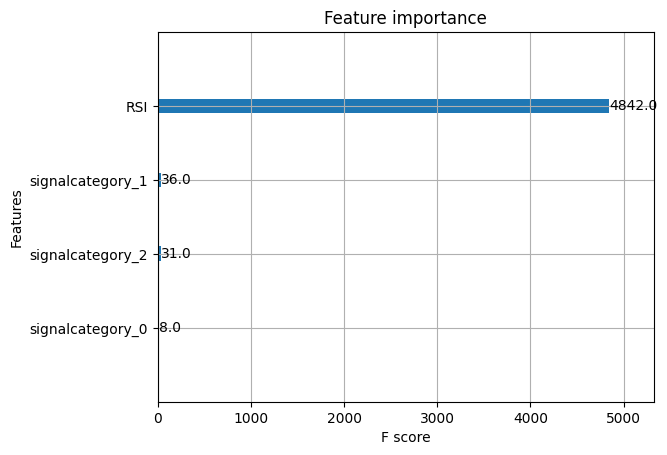

['RSI', 'signalcategory_0', 'signalcategory_1', 'signalcategory_2']


In [ ]:
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#plot feature importance
plot_importance(model)
pyplot.show()
print(model.get_booster().feature_names)

In [ ]:
from sklearn.neural_network import MLPClassifier

attributes = ['RSI', 'signalcategory_0', 'signalcategory_1', 'signalcategory_2']
X = df_model[attributes]
y = df_model['Target']

train_pct_index = int(0.6 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

NN = MLPClassifier(hidden_layer_sizes=(50, 50, 60, 30, 9), random_state=100, verbose=0, max_iter=1000, activation='relu')
NN.fit(X_train, y_train)
pred_train = NN.predict(X_train)
pred_test = NN.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print("="*20)

print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 81.3438%
****Test Results****
Accuracy: 89.4057%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix_train = confusion_matrix(y_train, pred_train)
matrix_test = confusion_matrix(y_test, pred_test)

print(matrix_train)
print(matrix_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print(report_train)
print(report_test)

[[3305    0    0]
 [ 400    0    0]
 [ 358    0    0]]
[[2422    0    0]
 [ 157    0    0]
 [ 130    0    0]]
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90      3305
         1.0       0.00      0.00      0.00       400
         2.0       0.00      0.00      0.00       358

    accuracy                           0.81      4063
   macro avg       0.27      0.33      0.30      4063
weighted avg       0.66      0.81      0.73      4063

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2422
         1.0       0.00      0.00      0.00       157
         2.0       0.00      0.00      0.00       130

    accuracy                           0.89      2709
   macro avg       0.30      0.33      0.31      2709
weighted avg       0.80      0.89      0.84      2709



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif